<a href="https://colab.research.google.com/github/alearecuest/0x00-Fix_My_Code_Challenge/blob/main/4_1_1_PRACTICE_Probability_%26_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Probability & Statistics

#### TODO:
1. Descriptive Statistics:
    * Calculate statistics such as Mode, Mean, Median and Standard Deviation of `weight` and `age`. Do they respond to any known distribution?
    * Carry out an analysis of outliers and missing values.
    * Explain how the metrics vary when we breakdown the dataset by `gender`. Do they respond to any known distribution? Qualitatively and graphically compare both distributions.
2. Calculate the marginal and joint probability, and the correlation between the  variables `Alcohol`  and `Smoking`.
    * Visually represent the joint probability between the possible values of the chosen variables.
3. Answer the following questions: What would happen to smoking levels if smoking is banned in bars? What would happen to the number of alcohol consumers if the number of smokers who drink alcohol decreases?

In [2]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

In [3]:
young = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/people_responses.csv')

In [ ]:
young.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


*****
## 1. Descriptive statistics

In [4]:
cols = ['Age', 'Weight']
stats = young[cols].describe().T
stats['mode'] = young[cols].mode().iloc[0]

print(stats[['mean', '50%', 'mode', 'std']])

             mean   50%  mode        std
Age     20.433699  20.0  19.0   2.828840
Weight  66.405051  64.0  60.0  13.839561


### Frequency Distribution by Age and Weight

In [5]:
print(young[['Age', 'Weight']].skew())
print(young[['Age', 'Weight']].kurt())

Age       1.148744
Weight    1.223725
dtype: float64
Age       1.578874
Weight    3.969322
dtype: float64


### Histogram

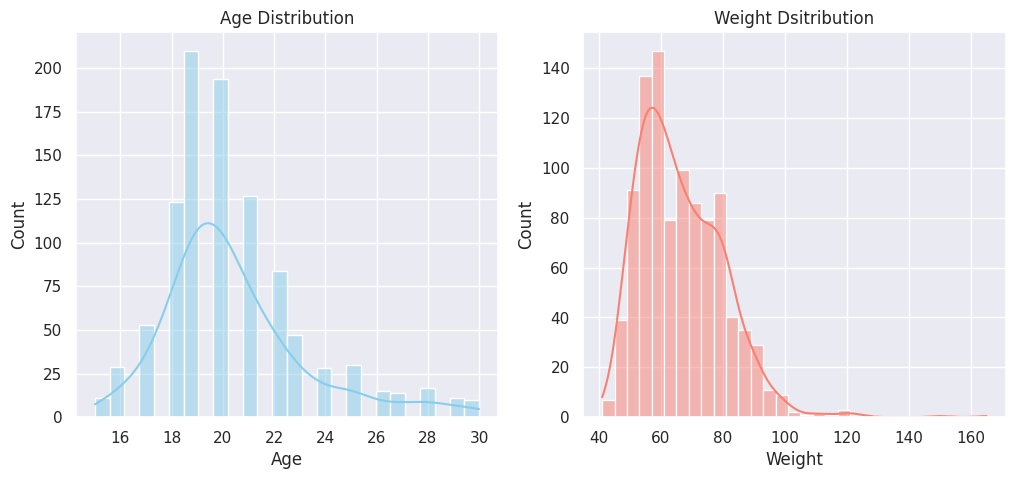

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(young['Age'].dropna(), kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

sns.histplot(young['Weight'].dropna(), kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Weight Dsitribution')

plt.show()

### Missing values

In [8]:
missing = young[['Age', 'Weight']].isnull().sum()
print(f"Valores faltantes:\n{missing}")

# Si quieres ver el porcentaje
print(f"\nPorcentaje de nulos:\n{missing / len(young) * 100}%")

Valores faltantes:
Age        7
Weight    20
dtype: int64

Porcentaje de nulos:
Age       0.693069
Weight    1.980198
dtype: float64%


### Outliers

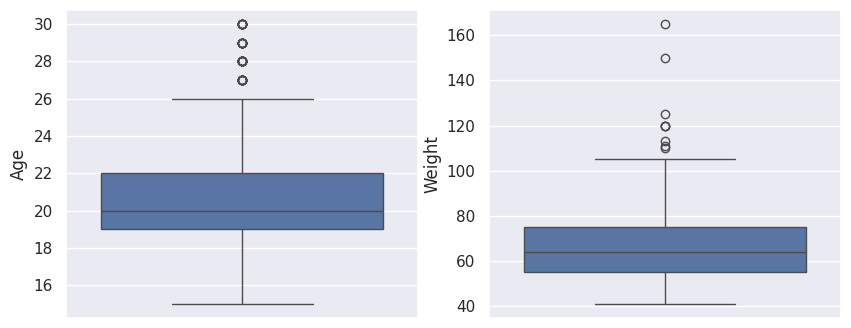

In [9]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y=young['Age'])
plt.subplot(1, 2, 2)
sns.boxplot(y=young['Weight'])
plt.show()

### Gender breakdown

          Age                                                    Weight  \
        count       mean       std   min   25%   50%   75%   max  count   
Gender                                                                    
female  589.0  20.113752  2.792537  15.0  18.0  20.0  21.0  30.0  580.0   
male    409.0  20.872861  2.796789  15.0  19.0  20.0  22.0  30.0  405.0   

                                                             
             mean        std   min   25%   50%   75%    max  
Gender                                                       
female  58.963793  10.005719  41.0  53.0  57.0  63.0  165.0  
male    77.088889  11.349838  53.0  70.0  77.0  83.0  150.0  


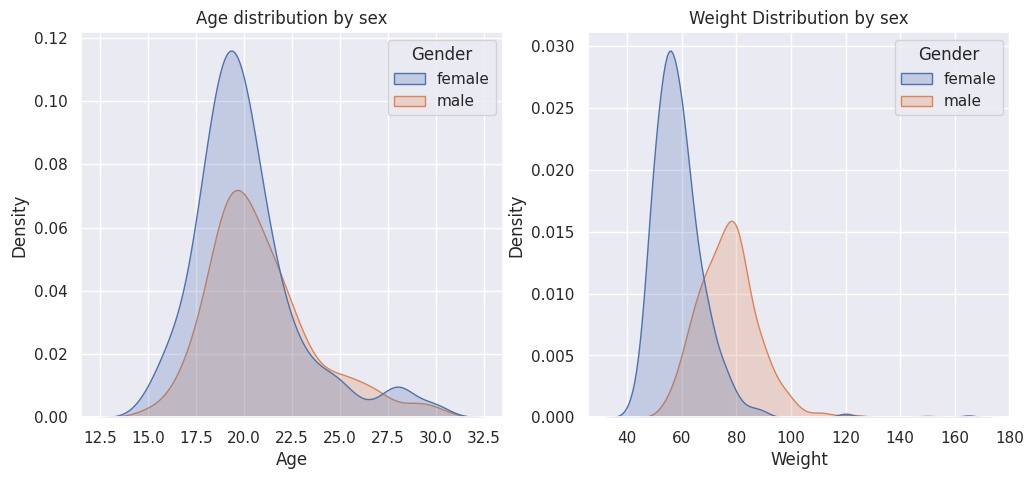

In [10]:
# Métricas por género
print(young.groupby('Gender')[['Age', 'Weight']].describe())

# Comparación gráfica
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data=young, x='Age', hue='Gender', fill=True)
plt.title('Age distribution by sex')

plt.subplot(1, 2, 2)
sns.kdeplot(data=young, x='Weight', hue='Gender', fill=True)
plt.title('Weight Distribution by sex')
plt.show()

### Correlation between variables

In [12]:
correlation = young[['Smoking', 'Alcohol']].apply(lambda x: x.astype('category').cat.codes).corr(method='spearman')
print(f"Correlation between Alcohol and Smoking:\n{correlation}")

Correlation between Alcohol and Smoking:
         Smoking  Alcohol
Smoking  1.00000  0.20731
Alcohol  0.20731  1.00000


****
## 2. Joint probability

#### To do this we will define the concepts of marginal probability and joint probability

Marginal Probability: Probability of one variable without considering another, for example:

$$P_X=P[X=x]=\sum_{\forall y_i}p_{xy}(x,y_i)$$

Joint Probability:


Alcohol,drink a lot,never,social drinker
Smoking,,,
current smoker,0.078,0.011,0.099
former smoker,0.055,0.011,0.109
never smoked,0.015,0.061,0.131
tried smoking,0.072,0.039,0.319



Marginal Probability (Smoking):
 Smoking
current smoker    0.188
former smoker     0.175
never smoked      0.207
tried smoking     0.430
dtype: float64

Marginal Probability (Alcohol):
 Alcohol
drink a lot       0.220
never             0.122
social drinker    0.658
dtype: float64


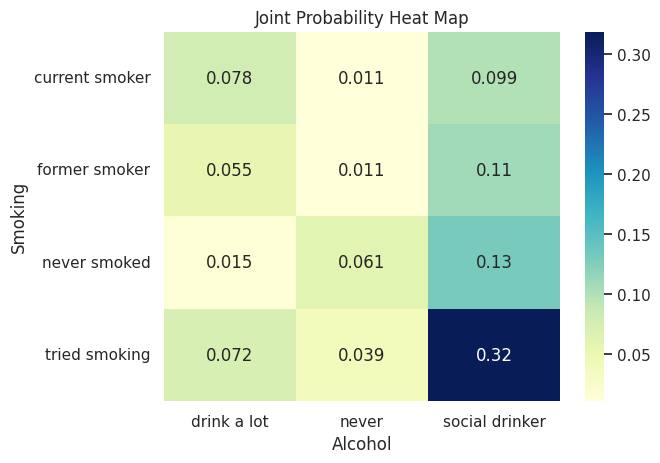

In [13]:
joint_prob = pd.crosstab(young['Smoking'], young['Alcohol'], normalize=True)
print("Joint Probability:")
display(joint_prob)

marginal_smoking = joint_prob.sum(axis=1)
marginal_alcohol = joint_prob.sum(axis=0)

print("\nMarginal Probability (Smoking):\n", marginal_smoking)
print("\nMarginal Probability (Alcohol):\n", marginal_alcohol)

sns.heatmap(joint_prob, annot=True, cmap='YlGnBu')
plt.title('Joint Probability Heat Map')
plt.show()

#### Joint Probability: In a bivariate or multivariate sample space, each possible outcome refers to two or more characteristics. Then the probability of a joint outcome is denoted $P(X \cap Y)$ and is defined as:

$$P_{XY}=P[(X=x)\cap(Y=y)]$$

__TODO:__
Do some research on [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) pandas function.

In [15]:
joint_probability = pd.crosstab(
    index=young['Smoking'],
    columns=young['Alcohol'],
    normalize=True
)

display(joint_probability)

Alcohol,drink a lot,never,social drinker
Smoking,,,
current smoker,0.078,0.011,0.099
former smoker,0.055,0.011,0.109
never smoked,0.015,0.061,0.131
tried smoking,0.072,0.039,0.319


****
## 3. Answers
### Smoking levels and smoking bans in bars

In [19]:
def analyze_smoking_alcohol_impact():
    answer_1 = (
        "1. What would happen to smoking levels if smoking is banned in bars?\n"
        "If the data shows a positive correlation between Smoking and Alcohol, it implies "
        "they are often concurrent behaviors. A ban in bars removes a primary environment "
        "for social smoking. Statistically, this would likely decrease the conditional "
        "probability P(Smoking | Alcohol), leading to a reduction in overall smoking levels."
    )

    answer_2 = (
        "2. What would happen to the number of alcohol consumers if the number of smokers who drink alcohol decreases?\n"
        "The marginal probability P(Alcohol) is the sum of (Smokers who drink) and (Non-smokers who drink). "
        "If the subgroup of smokers who drink alcohol decreases, the total number of alcohol "
        "consumers will drop proportionally, unless there is a compensatory increase in "
        "non-smokers who start drinking."
    )

    print(answer_1)
    print("-" * 150)
    print(answer_2)

analyze_smoking_alcohol_impact()

1. What would happen to smoking levels if smoking is banned in bars?
If the data shows a positive correlation between Smoking and Alcohol, it implies they are often concurrent behaviors. A ban in bars removes a primary environment for social smoking. Statistically, this would likely decrease the conditional probability P(Smoking | Alcohol), leading to a reduction in overall smoking levels.
------------------------------------------------------------------------------------------------------------------------------------------------------
2. What would happen to the number of alcohol consumers if the number of smokers who drink alcohol decreases?
The marginal probability P(Alcohol) is the sum of (Smokers who drink) and (Non-smokers who drink). If the subgroup of smokers who drink alcohol decreases, the total number of alcohol consumers will drop proportionally, unless there is a compensatory increase in non-smokers who start drinking.


****
# Extras:

## Other data visualizations

#### We choose some characteristics (numerical) and analyze them breaking down by gender using a box plot

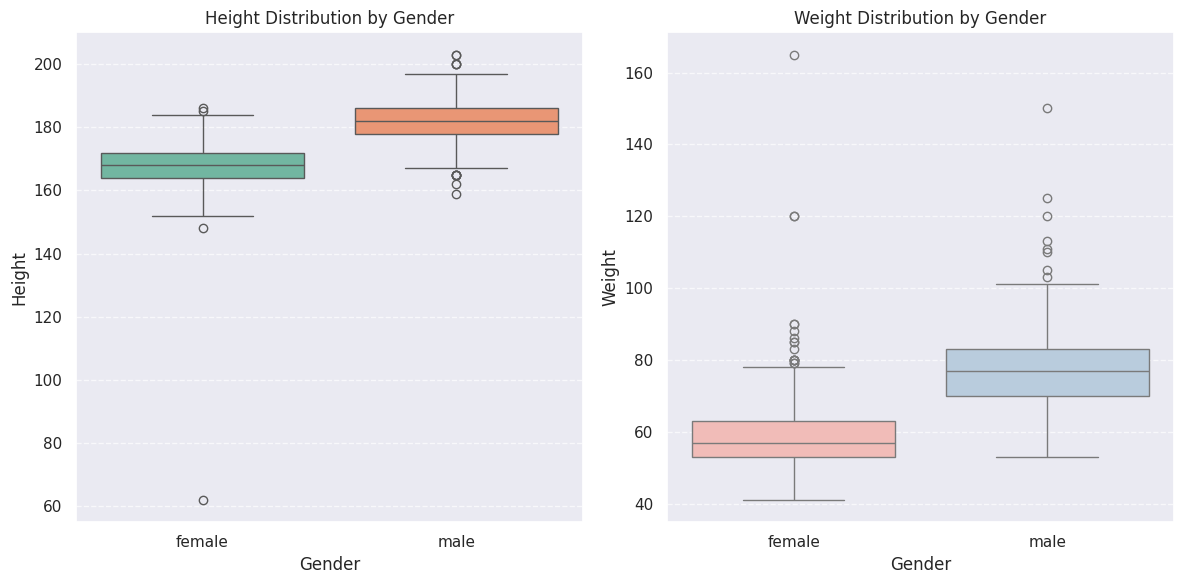

In [20]:
plt.figure(figsize=(12, 6))

# Subplot 1: Height breakdown by Gender
plt.subplot(1, 2, 1)
sns.boxplot(data=young, x='Gender', y='Height', palette='Set2')
plt.title('Height Distribution by Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Weight breakdown by Gender
plt.subplot(1, 2, 2)
sns.boxplot(data=young, x='Gender', y='Weight', palette='Pastel1')
plt.title('Weight Distribution by Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()